In [32]:
import pandas as pd

INPUT_MATRIX_6=pd.read_csv("INPUT_MATRIX_6.csv")
INPUT_MATRIX_6.index=INPUT_MATRIX_6.iloc[:,0]
INPUT_MATRIX_6=INPUT_MATRIX_6.iloc[:,1:97]

In [35]:
MATRIX_6=pd.read_csv("MATRIX_6.csv")
MATRIX_6.index=MATRIX_6.iloc[:,0]
MATRIX_6=MATRIX_6.iloc[:,1:97]

In [3]:
import pandas as pd

TARGET_6=pd.read_csv("TARGET_6.csv")
TARGET_6.index=TARGET_6.iloc[:,0]
TARGET_6=TARGET_6.iloc[:,1:97]

In [9]:
INPUT_EXP_6=pd.read_csv("/content/INPUT_EXP_6.csv")

In [10]:
INPUT_EXP_6.index=INPUT_MATRIX_6.index

In [11]:
INPUT_EXP_6=INPUT_EXP_6.iloc[:,1:80]

In [ ]:
#aggiungo UTCA

In [5]:
import pandas as pd
Matrix_WE_UTCA=pd.read_csv('/content/Mutational_Matrix_SBS.txt',sep='\t')

In [6]:
Matrix_WE_UTCA= Matrix_WE_UTCA.rename(index={idx: name for idx, name in zip(Matrix_WE_UTCA.index,Matrix_WE_UTCA.iloc[:,0])})

In [7]:
Matrix_WE_UTCA=Matrix_WE_UTCA.iloc[:,1:101]

In [8]:
# Calcolare la somma di ogni colonna
sum_columns = Matrix_WE_UTCA.sum()

In [12]:
# Normalizzare ogni colonna dividendo per la somma della colonna
Matrix_WE_UTCA_n= Matrix_WE_UTCA.divide(sum_columns)

In [2]:
import pandas as pd
COSMIC_SIGNATURE=pd.read_csv('/content/COSMIC_SIGNATURE.txt',sep='\t')

In [3]:
COSMIC_SIGNATURE = COSMIC_SIGNATURE.rename(index={idx: name for idx, name in zip(COSMIC_SIGNATURE.index,COSMIC_SIGNATURE.iloc[:,0])})

In [4]:
COSMIC_SIGNATURE=COSMIC_SIGNATURE.iloc[:,1:80]

In [17]:
import cvxpy as cp
import numpy as np


n, m = 79, 40
X = COSMIC_SIGNATURE.values
Y = Matrix_WE_UTCA_n.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]

# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w, 'fro') + 0.01*cp.norm(w, 1))  # Aggiunta della penalizzazione L1

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_UTCA = w.value
print("Coefficients:", coefficients_UTCA)


Coefficients: [[1.34694736e-01 9.30048537e-02 1.02393834e-01 ... 2.76930679e-02
  2.32721494e-13 1.54386597e-01]
 [1.38250542e-12 1.01954992e-01 9.88765609e-02 ... 2.68521882e-12
  2.45553113e-13 4.54472814e-02]
 [2.10184550e-11 1.86567140e-12 1.45593443e-12 ... 2.01747649e-12
  2.35894127e-12 3.86959997e-12]
 ...
 [1.49299812e-12 9.06760024e-13 1.00640733e-12 ... 1.56470136e-12
  4.41508290e-13 1.40141157e-12]
 [1.51435890e-12 5.57265584e-13 1.11403703e-12 ... 1.26360880e-12
  3.78729179e-03 5.52010480e-12]
 [8.47296676e-13 5.15631963e-13 6.36832053e-13 ... 7.03021191e-13
  7.38584897e-13 8.97175944e-13]]


In [18]:
Coefficients_UTCA=pd.DataFrame(coefficients_UTCA)

In [19]:
Coefficients_UTCA.index=COSMIC_SIGNATURE.columns

In [20]:
Coefficients_UTCA.columns=Matrix_WE_UTCA.columns

In [21]:
Matrix_WG_UTCA=pd.read_csv('/content/Mutational_Matrix_SBS.txt',sep='\t')

In [22]:
Matrix_WG_UTCA = Matrix_WG_UTCA.rename(index={idx: name for idx, name in zip(Matrix_WG_UTCA.index,Matrix_WG_UTCA.iloc[:,0])})

In [23]:
Matrix_WG_UTCA=Matrix_WG_UTCA.iloc[:,1:101]

In [25]:
# Calcolare la somma di ogni colonna
sum_columns = Matrix_WG_UTCA.sum()


In [26]:
# Normalizzare ogni colonna dividendo per la somma della colonna
Matrix_WG_UTCA= Matrix_WG_UTCA.divide(sum_columns)

In [27]:
import cvxpy as cp
import numpy as np


n, m = 79,40
X = COSMIC_SIGNATURE.values
Y = Matrix_WG_UTCA.values

w = cp.Variable((n, m))
#threshold=1e-12
# Vincoli
constraints = [
     w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+ 0.01 *cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()


coefficients_WG_UTCA = w.value
print("Coefficients:", coefficients_WG_UTCA)


Coefficients: [[7.18298988e-02 5.54879399e-02 5.52176968e-02 ... 1.01601330e-01
  4.88839268e-02 7.06793136e-02]
 [1.75746809e-02 1.56998602e-01 1.51081522e-01 ... 4.48477664e-03
  3.87344823e-03 3.55704517e-02]
 [5.75573753e-02 1.11394012e-02 1.54900421e-11 ... 1.09351653e-11
  4.83965497e-11 1.15978823e-11]
 ...
 [2.27510371e-11 1.27127083e-02 1.48584512e-11 ... 7.09706345e-12
  5.99400744e-12 5.00964693e-12]
 [5.52427388e-03 1.53340865e-10 2.67522565e-11 ... 7.36125790e-12
  2.32909539e-02 1.04711192e-12]
 [1.70435579e-12 1.81588677e-12 1.45804467e-12 ... 2.16937215e-12
  2.56649722e-12 1.53332463e-12]]


In [28]:
Coefficients_WG_UTCA=pd.DataFrame(coefficients_WG_UTCA)

In [29]:
Coefficients_WG_UTCA.index=COSMIC_SIGNATURE.columns

In [30]:
Coefficients_WG_UTCA.columns=Matrix_WG_UTCA.columns

In [ ]:
#metto insieme

In [37]:
INPUT_MATRIX_7=pd.concat([INPUT_MATRIX_6,Matrix_WE_UTCA_n.T],ignore_index=False)

In [38]:
INPUT_MATRIX_7

,A[C>A]A,A[C>A]C,A[C>A]G,A[C>A]T,A[C>G]A,A[C>G]C,A[C>G]G,A[C>G]T,A[C>T]A,A[C>T]C,...,T[T>A]G,T[T>A]T,T[T>C]A,T[T>C]C,T[T>C]G,T[T>C]T,T[T>G]A,T[T>G]C,T[T>G]G,T[T>G]T
SA594315,0.008584,0.000000,0.000000,0.000000,0.008584,0.000000,0.000000,0.004292,0.025751,0.008584,...,0.004292,0.004292,0.000000,0.004292,0.000000,0.004292,0.004292,0.000000,0.000000,0.004292
SA594666,0.001109,0.004435,0.000000,0.002217,0.006652,0.001109,0.002217,0.009978,0.000000,0.003326,...,0.000000,0.002217,0.000000,0.000000,0.000000,0.000000,0.002217,0.001109,0.000000,0.004435
SA594675,0.029851,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.014925,0.014925,0.014925,...,0.000000,0.000000,0.029851,0.014925,0.014925,0.014925,0.000000,0.000000,0.000000,0.000000
SA594687,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SA594695,0.000000,0.018868,0.000000,0.000000,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.018868,0.000000,0.037736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA601538,0.017544,0.000000,0.000000,0.008772,0.008772,0.008772,0.008772,0.017544,0.008772,0.008772,...,0.000000,0.000000,0.017544,0.008772,0.000000,0.000000,0.000000,0.000000,0.008772,0.000000
SA601545,0.001605,0.003210,0.000803,0.004013,0.004013,0.000803,0.002408,0.004013,0.026485,0.011236,...,0.000000,0.002408,0.007223,0.007223,0.009631,0.008828,0.000803,0.002408,0.000803,0.000000
SA601548,0.000000,0.002387,0.000796,0.004773,0.003182,0.000796,0.002387,0.004773,0.035004,0.012729,...,0.001591,0.003978,0.008751,0.007160,0.008751,0.007160,0.000796,0.002387,0.000796,0.000000
SA601559,0.011236,0.028090,0.000000,0.016854,0.005618,0.011236,0.000000,0.005618,0.011236,0.011236,...,0.000000,0.016854,0.005618,0.000000,0.005618,0.000000,0.000000,0.000000,0.000000,0.011236


In [39]:
TARGET_7=pd.concat([TARGET_6,Coefficients_WG_UTCA.T],ignore_index=False)

In [40]:
INPUT_EXP_7=pd.concat([INPUT_EXP_6,Coefficients_UTCA.T],ignore_index=False)

In [41]:
MATRIX_7=pd.concat([MATRIX_6,Matrix_WE_UTCA.T],ignore_index=False)

In [42]:
###salvo i dataset da 7
# Specify the file path
file_path = '/content/INPUT_EXP_7.csv'

# Save the DataFrame to a CSV file
INPUT_EXP_7.to_csv(file_path, index=True)

# Specify the file path
file_path = '/content/INPUT_MATRIX_7.csv'

# Save the DataFrame to a CSV file
INPUT_MATRIX_7.to_csv(file_path, index=True)

# Specify the file path
file_path = '/content/TARGET_7.csv'

# Save the DataFrame to a CSV file
TARGET_7.to_csv(file_path, index=True)

# Specify the file path
file_path = '/content/MATRIX_7.csv'

# Save the DataFrame to a CSV file
MATRIX_7.to_csv(file_path, index=True)

In [ ]:
#ANN

In [5]:
import pandas as pd
TARGET_7=pd.read_csv("TARGET_7.csv")
TARGET_7.index=TARGET_7.iloc[:,0]
TARGET_7=TARGET_7.iloc[:,1:80]

In [6]:
INPUT_EXP_7=pd.read_csv("INPUT_EXP_7.csv")
INPUT_EXP_7.index=INPUT_EXP_7.iloc[:,0]
INPUT_EXP_7=INPUT_EXP_7.iloc[:,1:80]

In [7]:
INPUT_MATRIX_7=pd.read_csv("INPUT_MATRIX_7.csv")
INPUT_MATRIX_7.index=INPUT_MATRIX_7.iloc[:,0]
INPUT_MATRIX_7=INPUT_MATRIX_7.iloc[:,1:97]

In [8]:
MATRIX_7=pd.read_csv("MATRIX_7.csv")
MATRIX_7.index=MATRIX_7.iloc[:,0]
MATRIX_7=MATRIX_7.iloc[:,1:97]

In [13]:
df=pd.concat([INPUT_MATRIX_7,TARGET_7],axis=1)

In [14]:
import torch
import torch.nn as nn
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
df_shuffled = shuffle(df, random_state=42)

In [16]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
import numpy as np
D_KL=np.zeros(902)
for i in range(902):
  D_KL[i]=np.sum(TARGET_7.iloc[i,:]*np.log(TARGET_7.iloc[i,:]/INPUT_EXP_7.iloc[i,:]))

In [17]:
np.mean(D_KL)

8.97770430328756

In [18]:
input_matrix=df_shuffled.iloc[:,0:96]

In [19]:
target=df_shuffled.iloc[:,96:175]

In [20]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
TEST_OUTPUTS={}
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

input_size = 96
hidden_size = 128
output_size = 79


input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)


input_data_numpy = input_data.numpy()
output_data_numpy = output_data.numpy()

loo = LeaveOneOut()
total_samples = len(input_data)
errors=[]
z=0
for train_index, test_index in loo.split(input_data):
    torch.manual_seed(seed)
    np.random.seed(seed)
    # Training set e test set
    net = NeuralNetwork(input_size, hidden_size, output_size)
    criterion = nn.KLDivLoss(reduction='batchmean')
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    X_train, X_test = input_data_numpy[train_index], input_data_numpy[test_index]
    y_train, y_test = output_data_numpy[train_index], output_data_numpy[test_index]

    # Addestramento
    for epoch in range(1000):
        optimizer.zero_grad()
        outputs = net(torch.tensor(X_train).float())
        loss = criterion(outputs, torch.tensor(y_train))
        loss.backward()
        optimizer.step()

    # Valutazione
    test_outputs = net(torch.tensor(X_test).float())
    test_loss = criterion(test_outputs, torch.tensor(y_test))
    TEST_OUTPUTS[z]=torch.exp(test_outputs)
    z=z+1
    errors.append(test_loss.item())


average_error = sum(errors) / len(errors)
print(f'Media degli errori: {average_error}')

Media degli errori: 0.7087754087511389


VALIDATION 1 BRCA ->72

In [21]:
input_val=INPUT_MATRIX_7.iloc[0:72,:]
target_val=TARGET_7.iloc[0:72,:]

In [22]:
df=pd.concat([INPUT_MATRIX_7.iloc[72:902,:],TARGET_7.iloc[72:902,:]],axis=1)

In [23]:
from sklearn.utils import shuffle
df_shuffled = shuffle(df, random_state=42)

In [24]:
input_matrix=df_shuffled.iloc[:,0:96]

In [25]:
target=df_shuffled.iloc[:,96:175]

In [26]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

import torch
import torch.nn as nn

# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 96
hidden_size = 128
output_size = 79

torch.manual_seed(seed)
np.random.seed(seed)

# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)

# Addestramento della rete
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')



Epoch 1/1000, Loss: 1.8368851695403223
Epoch 11/1000, Loss: 1.793657658414145
Epoch 21/1000, Loss: 1.7400062858178447
Epoch 31/1000, Loss: 1.6703025480712532
Epoch 41/1000, Loss: 1.5876717269792968
Epoch 51/1000, Loss: 1.5033337337404737
Epoch 61/1000, Loss: 1.4310812531766959
Epoch 71/1000, Loss: 1.3772620485057345
Epoch 81/1000, Loss: 1.3394837960781807
Epoch 91/1000, Loss: 1.3090201907088084
Epoch 101/1000, Loss: 1.2792919160938778
Epoch 111/1000, Loss: 1.2475409004177946
Epoch 121/1000, Loss: 1.2130717872169112
Epoch 131/1000, Loss: 1.1760802537798174
Epoch 141/1000, Loss: 1.1375319713053584
Epoch 151/1000, Loss: 1.09855098383078
Epoch 161/1000, Loss: 1.0601212878115769
Epoch 171/1000, Loss: 1.0228836255981444
Epoch 181/1000, Loss: 0.9873742241838099
Epoch 191/1000, Loss: 0.9540547135795702
Epoch 201/1000, Loss: 0.9232791678489959
Epoch 211/1000, Loss: 0.8952284550213687
Epoch 221/1000, Loss: 0.869958028806096
Epoch 231/1000, Loss: 0.8473401851057483
Epoch 241/1000, Loss: 0.8271416

In [27]:
input_data_VAL = torch.tensor(input_val.values).float()

In [28]:
OUTPUT_VAL=net(input_data_VAL)

In [29]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [30]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [31]:
COSMIC_SIGNATURE=pd.read_csv('/content/COSMIC_SIGNATURE.txt',sep='\t')

In [32]:
COSMIC_SIGNATURE = COSMIC_SIGNATURE.rename(index={idx: name for idx, name in zip(COSMIC_SIGNATURE.index,COSMIC_SIGNATURE.iloc[:,0])})

In [33]:
COSMIC_SIGNATURE=COSMIC_SIGNATURE.iloc[:,1:80]

In [34]:
OUTPUT_VAL_PD.columns=COSMIC_SIGNATURE.columns
OUTPUT_VAL_PD.index=input_val.index

In [35]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
import numpy as np
D_KL=np.zeros(72)
for i in range(72):
  D_KL[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i,:]))

In [36]:
np.mean(D_KL)

9.759401646816425

In [38]:
D_KL_ANN=np.zeros(72)
for i in range(72):
  D_KL_ANN[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))

In [39]:
np.mean(D_KL_ANN)

0.7150990008281969

METODO CORRETTIVO

In [40]:
mutazioni_96=COSMIC_SIGNATURE.index.to_list()

In [41]:
posizioni_desiderate = [0, 4, 6]  # Posizioni delle lettere da estrarre

In [42]:
triplette_96=["NA"] * 96

In [43]:
#per risalire a triplette
for j in range(len(mutazioni_96)):
  triplette_96[j]=(''.join([mutazioni_96[j][i] for i in posizioni_desiderate]))


In [44]:
triplette_WE={
"AAA": 971543,
"AAC": 457937,
"AAG": 683449,
"AAT": 613659,
"ACA": 645172,
"ACC": 467461,
"ACG": 166834,
"ACT": 522169,
"AGA": 733161,
"AGC": 633194,
"AGG": 732167,
"AGT": 517622,
"ATA": 452047,
"ATC": 433601,
"ATG": 570462,
"ATT": 617871,
"CAA": 618247,
"CAC": 589351,
"CAG": 903792,
"CAT": 608159,
"CCA": 804743,
"CCC": 688716,
"CCG": 302071,
"CCT": 828509,
"CGA": 175264,
"CGC": 262799,
"CGG": 296517,
"CGT": 173362,
"CTA": 347395,
"CTC": 675140,
"CTG": 889111,
"CTT": 700889,
"GAA": 705840,
"GAC": 423424,
"GAG": 709204,
"GAT": 464568,
"GCA": 632684,
"GCC": 658721,
"GCG": 261926,
"GCT": 662238,
"GGA": 718540,
"GGC": 675179,
"GGG": 695185,
"GGT": 495737,
"GTA": 331134,
"GTC": 415338,
"GTG": 593450,
"GTT": 475249,
"TAA": 495405,
"TAC": 334514,
"TAG": 338906,
"TAT": 470135,
"TCA": 671563,
"TCC": 678613,
"TCG": 167328,
"TCT": 758038,
"TGA": 666395,
"TGC": 610982,
"TGG": 768587,
"TGT": 656330,
"TTA": 495270,
"TTC": 669495,
"TTG": 588421,
"TTT": 970870}

In [45]:
somma_valori_tripletteWE = sum(triplette_WE.values())

In [46]:
for key in triplette_WE:
    triplette_WE[key] /= somma_valori_tripletteWE

In [47]:
triplette_WG={
    'AAA': 38111156,
         'AAC': 14477650,
         'AAG': 19838087,
         'AAT': 24726104,
         'ACA': 20058100,
         'ACC': 11637985,
         'ACG': 2522576,
         'ACT': 16006323,
         'AGA': 22032850,
         'AGC': 13971789,
         'AGG': 17784375,
         'AGT': 16027165,
         'ATA': 20424450,
         'ATC': 13297469,
         'ATG': 18289096,
         'ATT': 24744309,
         'CAA': 18821687,
         'CAC': 15021434,
         'CAG': 20277838,
         'CAT': 18270059,
         'CCA': 18438491,
         'CCC': 13225895,
         'CCG': 2797677,
         'CCT': 17793617,
         'CGA': 2222992,
         'CGC': 2410618,
         'CGG': 2800948,
         'CGT': 2525426,
         'CTA': 12811080,
         'CTC': 16861443,
         'CTG': 20285307,
         'CTT': 19864832,
         'GAA': 19623577,
         'GAC': 9440460,
         'GAG': 16869395,
         'GAT': 13313709,
         'GCA': 14374147,
         'GCC': 11956723,
         'GCG': 2411316,
         'GCT': 13973363,
         'GGA': 15471216,
         'GGC': 11947940,
         'GGG': 13230267,
         'GGT': 11641887,
         'GTA': 11280782,
         'GTC': 9460393,
         'GTG': 15052446,
         'GTT': 14529889,
         'TAA': 20594734,
         'TAC': 11276596,
         'TAG': 12829959,
         'TAT': 20439748,
         'TCA': 19511980,
         'TCC': 15450553,
         'TCG': 2228508,
         'TCT': 22050472,
         'TGA': 19524235,
         'TGC': 14389204,
         'TGG': 18494922,
         'TGT': 20115781,
         'TTA': 20618925,
         'TTC': 19636248,
         'TTG': 18882367,
         'TTT': 38233904
}

In [48]:
somma_valori_tripletteWG = sum(triplette_WG.values())

In [49]:
for key in triplette_WG:
    triplette_WG[key] /= somma_valori_tripletteWG

In [50]:
rapporti = {key: triplette_WG[key] / triplette_WE[key] for key in triplette_WG if key in triplette_WE}

In [51]:
MATRIX_adjusted_VAL=MATRIX_7.iloc[0:72,:].copy()

In [52]:
for i in range(MATRIX_adjusted_VAL.shape[1]):
  MATRIX_adjusted_VAL.iloc[:,i]=(MATRIX_7.iloc[0:72,i]*rapporti[triplette_96[i]])+np.mean(MATRIX_7.iloc[0:72,i])

In [53]:
MATRIX_adjusted_VAL=MATRIX_adjusted_VAL.T

In [54]:
# Calcolare la somma di ogni colonna
sum_columns =MATRIX_adjusted_VAL.sum()


In [55]:
# Normalizzare ogni colonna dividendo per la somma della colonna
MATRIX_adjusted_VAL= MATRIX_adjusted_VAL.divide(sum_columns)

In [56]:
import cvxpy as cp
import numpy as np


n, m = 79, 72
X = COSMIC_SIGNATURE.values
Y = MATRIX_adjusted_VAL.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj_VAL = w.value
print("Coefficients:", coefficients_WE_adj_VAL)

Coefficients: [[1.38785113e-01 2.82299215e-02 1.14150312e-01 ... 2.92767666e-02
  1.12893145e-01 7.17882065e-02]
 [2.81621455e-01 2.82021946e-01 1.61695655e-01 ... 3.01369569e-01
  1.37746583e-01 1.45186470e-01]
 [5.41965575e-12 5.77247214e-13 1.10331357e-01 ... 1.46037551e-12
  1.38803481e-02 1.93645750e-12]
 ...
 [1.75197488e-12 4.16443794e-13 5.47529196e-13 ... 4.30058784e-13
  2.28465716e-02 4.49572742e-13]
 [1.78251789e-12 2.78993875e-13 9.88862781e-03 ... 3.33399762e-12
  6.73439665e-13 5.72143117e-13]
 [6.01976661e-13 2.12233066e-13 7.59097270e-13 ... 1.53477608e-12
  1.33739693e-12 7.29432103e-13]]


In [57]:
coefficients_WE_adj_VAL=pd.DataFrame(coefficients_WE_adj_VAL)

In [58]:
coefficients_WE_adj_VAL.index=COSMIC_SIGNATURE.columns

In [59]:
coefficients_WE_adj_VAL.columns=MATRIX_adjusted_VAL.columns

In [60]:
##BOXPLOT DELLE VARIE DIFFERENZE in termini di KL DIVERGENCE
D_ADJ_val=np.zeros(72)
for i in range(72):
  D_ADJ_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/coefficients_WE_adj_VAL.iloc[:,i]))
np.mean(D_ADJ_val)

6.6623496977163965

In [61]:
D_kl_val=np.zeros(72)
for i in range(72):
  D_kl_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i,:]))
np.mean(D_kl_val)

9.759401646816425

In [62]:
D_kl_ann_val=np.zeros(72)
for i in range(72):
  D_kl_ann_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))
np.mean(D_kl_ann_val)

0.7150990008281969

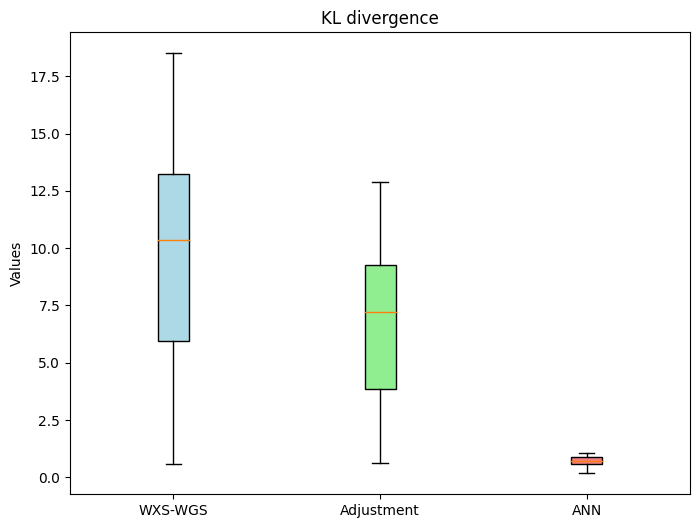

In [63]:
# Creazione della figura e degli assi
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
boxplot1 = ax.boxplot(D_kl_val, positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(D_ADJ_val, positions=[2], patch_artist=True)
boxplot3 = ax.boxplot(D_kl_ann_val, positions=[3], patch_artist=True)

# Personalizzazione dei colori
colors = ['lightblue', 'lightgreen', 'lightcoral']
for box, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Aggiunta di etichette e titoli
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['WXS-WGS', 'Adjustment', 'ANN'])
ax.set_ylabel('Values')
ax.set_title('KL divergence')

# Mostrare il grafico
plt.show()

VALIDATION 2 OV -> 115

In [64]:
input_val=INPUT_MATRIX_7.iloc[72:187,:]
target_val=TARGET_7.iloc[72:187,:]

In [65]:
df1=pd.concat([INPUT_MATRIX_7.iloc[0:72,:],TARGET_7.iloc[0:72,:]],axis=1)

In [66]:
df2=pd.concat([INPUT_MATRIX_7.iloc[187:902,:],TARGET_7.iloc[187:902,:]],axis=1)

In [67]:
df=df1.append(df2)

<ipython-input-67-a9d981095968>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [68]:
df_shuffled = shuffle(df, random_state=42)

In [69]:
input_matrix=df_shuffled.iloc[:,0:96]

In [70]:
target=df_shuffled.iloc[:,96:175]

In [72]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
import torch
import torch.nn as nn

# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 96
hidden_size = 128
output_size = 79
torch.manual_seed(seed)
np.random.seed(seed)
# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)

# Addestramento della rete
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')



Epoch 1/1000, Loss: 1.8587595748477619
Epoch 11/1000, Loss: 1.8155991493127812
Epoch 21/1000, Loss: 1.7625873019717997
Epoch 31/1000, Loss: 1.6935201139962144
Epoch 41/1000, Loss: 1.611347591998876
Epoch 51/1000, Loss: 1.5276228183894394
Epoch 61/1000, Loss: 1.456463858088826
Epoch 71/1000, Loss: 1.402616060684282
Epoch 81/1000, Loss: 1.3614306534553062
Epoch 91/1000, Loss: 1.326955317661443
Epoch 101/1000, Loss: 1.294045818471512
Epoch 111/1000, Loss: 1.2592996393613305
Epoch 121/1000, Loss: 1.2217265205511498
Epoch 131/1000, Loss: 1.1816402367621937
Epoch 141/1000, Loss: 1.1400830629219014
Epoch 151/1000, Loss: 1.098261399581636
Epoch 161/1000, Loss: 1.0572619594462866
Epoch 171/1000, Loss: 1.0178298096450327
Epoch 181/1000, Loss: 0.9805155918294852
Epoch 191/1000, Loss: 0.9457064127839591
Epoch 201/1000, Loss: 0.9136781783538658
Epoch 211/1000, Loss: 0.8845523238213567
Epoch 221/1000, Loss: 0.8583609370081726
Epoch 231/1000, Loss: 0.8350203472208247
Epoch 241/1000, Loss: 0.814343922

In [73]:
input_data_VAL = torch.tensor(input_val.values).float()

In [74]:
OUTPUT_VAL=net(input_data_VAL)

In [75]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [76]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [77]:
OUTPUT_VAL_PD.columns=COSMIC_SIGNATURE.columns
OUTPUT_VAL_PD.index=input_val.index

In [78]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
D_KL=np.zeros(115)
for i in range(115):
  D_KL[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+72,:]))

In [79]:
np.mean(D_KL)

10.489048394994192

In [80]:
D_KL_ANN=np.zeros(115)
for i in range(115):
  D_KL_ANN[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))

In [81]:
np.mean(D_KL_ANN)

0.7743574957807902

METODO CORRETTIVO

In [82]:
MATRIX_adjusted_VAL=MATRIX_7.iloc[72:187,:].copy()

In [83]:
for i in range(MATRIX_adjusted_VAL.shape[1]):
  MATRIX_adjusted_VAL.iloc[:,i]=(MATRIX_7.iloc[72:187,i]*rapporti[triplette_96[i]])+np.mean(MATRIX_7.iloc[72:187,i])

In [84]:
MATRIX_adjusted_VAL=MATRIX_adjusted_VAL.T

In [85]:
# Calcolare la somma di ogni colonna
sum_columns =MATRIX_adjusted_VAL.sum()

In [86]:
# Normalizzare ogni colonna dividendo per la somma della colonna
MATRIX_adjusted_VAL= MATRIX_adjusted_VAL.divide(sum_columns)

In [87]:
import cvxpy as cp
import numpy as np


n, m = 79, 115
X = COSMIC_SIGNATURE.values
Y = MATRIX_adjusted_VAL.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj_VAL = w.value
print("Coefficients:", coefficients_WE_adj_VAL)

Coefficients: [[2.15283348e-02 9.78551151e-03 6.70122296e-02 ... 1.01829000e-12
  3.59368914e-02 8.08618833e-02]
 [1.25838002e-02 5.12392136e-02 2.32464342e-02 ... 3.55700670e-02
  5.35647757e-03 3.77713635e-03]
 [5.04453295e-02 5.20704742e-02 2.74212273e-01 ... 1.74446111e-01
  5.56289914e-02 1.79973598e-02]
 ...
 [1.20998742e-12 1.31205271e-12 3.31284353e-13 ... 1.06761524e-02
  4.78986541e-13 5.50071561e-03]
 [1.52614534e-02 1.22472871e-12 9.08698382e-13 ... 5.30673256e-13
  3.16569899e-02 1.99839684e-12]
 [4.98669193e-13 4.76341991e-12 1.51127516e-12 ... 2.32560306e-12
  4.87127940e-13 1.11128386e-12]]


In [88]:
coefficients_WE_adj_VAL=pd.DataFrame(coefficients_WE_adj_VAL)

In [89]:
coefficients_WE_adj_VAL.index=COSMIC_SIGNATURE.columns

In [90]:
coefficients_WE_adj_VAL.columns=MATRIX_adjusted_VAL.columns

In [91]:
coefficients_WE_adj_VAL

Unnamed: 0,SA505244,SA505245,SA505256,SA505258,SA505270,SA505271,SA505282,SA505284,SA505297,SA505298,...,SA505889,SA505897,SA505904,SA505906,SA505918,SA505919,SA505930,SA505933,SA505944,SA505950
SBS1,2.152833e-02,9.785512e-03,6.701223e-02,3.518050e-02,3.309283e-02,2.137949e-02,1.448188e-02,2.990401e-02,1.013443e-02,1.066931e-01,...,4.725528e-02,3.138919e-02,6.323649e-02,4.296337e-02,4.347235e-02,1.336081e-02,4.209745e-03,1.018290e-12,3.593689e-02,8.086188e-02
SBS2,1.258380e-02,5.123921e-02,2.324643e-02,2.300292e-02,2.528954e-12,1.039810e-02,7.249244e-02,9.706725e-03,1.207062e-02,2.579205e-02,...,2.003573e-13,1.747502e-02,2.271391e-02,2.414810e-02,1.904983e-03,1.084106e-02,2.075786e-02,3.557007e-02,5.356478e-03,3.777136e-03
SBS3,5.044533e-02,5.207047e-02,2.742123e-01,1.774270e-01,7.818302e-02,1.504606e-01,5.162122e-12,7.121498e-02,6.635283e-12,6.666063e-02,...,6.403851e-12,1.813764e-01,1.339556e-01,1.430846e-01,9.623743e-02,4.186204e-12,3.965471e-12,1.744461e-01,5.562899e-02,1.799736e-02
SBS4,1.753976e-01,2.646856e-11,1.456223e-02,7.213361e-13,8.457199e-12,3.336539e-02,3.811370e-02,4.609312e-02,9.363435e-02,3.157759e-02,...,5.508814e-02,1.420956e-12,1.156286e-01,1.398862e-12,7.310962e-02,7.887008e-13,8.955305e-13,4.746249e-02,6.011549e-02,2.597133e-02
SBS5,2.045440e-12,3.432350e-12,6.026984e-02,1.621963e-12,6.987461e-02,9.508747e-12,4.118062e-02,3.084208e-12,1.098587e-12,2.667763e-11,...,1.543632e-01,3.229639e-12,8.260853e-13,3.591216e-12,1.587085e-01,1.800025e-12,2.834424e-12,9.874203e-12,1.142073e-02,3.479265e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SBS91,6.409939e-14,2.044954e-13,1.252754e-02,1.499971e-02,9.115616e-03,2.352716e-03,7.583617e-13,3.981169e-12,1.404260e-12,3.482251e-13,...,1.115339e-12,1.106803e-02,2.874395e-03,1.940370e-03,1.963986e-13,1.455111e-12,1.893871e-13,3.330361e-13,3.789690e-13,7.135248e-03
SBS92,1.049974e-12,5.062066e-13,1.058677e-12,4.544622e-13,6.698494e-13,2.290449e-04,1.740635e-12,6.983407e-13,2.399946e-02,1.096016e-11,...,1.801801e-12,8.140025e-13,5.849259e-13,9.754750e-13,8.102309e-13,1.832253e-12,1.582133e-12,1.133141e-12,1.414283e-12,1.831411e-10
SBS93,1.209987e-12,1.312053e-12,3.312844e-13,1.220947e-02,1.331772e-12,6.414032e-03,5.070229e-13,2.203651e-13,1.915421e-02,1.057931e-12,...,6.098394e-13,6.423192e-13,8.422306e-13,1.342239e-12,1.331270e-12,1.025432e-11,3.534216e-12,1.067615e-02,4.789865e-13,5.500716e-03
SBS94,1.526145e-02,1.224729e-12,9.086984e-13,5.750725e-13,1.113702e-12,4.380862e-13,5.328216e-04,5.194162e-13,7.228164e-03,1.366301e-02,...,8.157108e-13,6.188652e-13,5.573948e-13,1.116296e-12,1.063419e-12,9.755183e-13,6.992034e-03,5.306733e-13,3.165699e-02,1.998397e-12


In [92]:
##BOXPLOT DELLE VARIE DIFFERENZE in termini di KL DIVERGENCE
D_ADJ_val=np.zeros(115)
for i in range(115):
  D_ADJ_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/coefficients_WE_adj_VAL.iloc[:,i]))
np.mean(D_ADJ_val)

5.978304575515344

In [93]:
D_kl_val=np.zeros(115)
for i in range(115):
  D_kl_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+72,:]))
np.mean(D_kl_val)

10.489048394994192

In [94]:
D_kl_ann_val=np.zeros(115)
for i in range(115):
  D_kl_ann_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))
np.mean(D_kl_ann_val)

0.7743574957807902

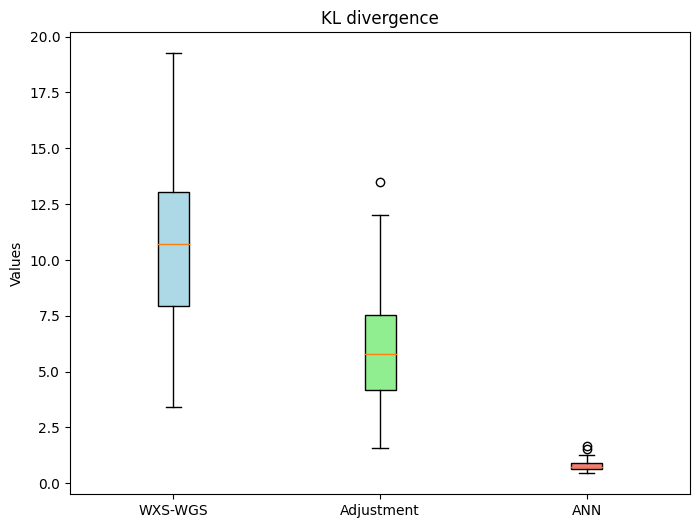

In [95]:
# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
boxplot1 = ax.boxplot(D_kl_val, positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(D_ADJ_val, positions=[2], patch_artist=True)
boxplot3 = ax.boxplot(D_kl_ann_val, positions=[3], patch_artist=True)

# Personalizzazione dei colori
colors = ['lightblue', 'lightgreen', 'lightcoral']
for box, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Aggiunta di etichette e titoli
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['WXS-WGS', 'Adjustment', 'ANN'])
ax.set_ylabel('Values')
ax.set_title('KL divergence')

# Mostrare il grafico
plt.show()

VALIDATION 3 MALY ->234

In [96]:
input_val=INPUT_MATRIX_7.iloc[187:421,:]
target_val=TARGET_7.iloc[187:421,:]

In [97]:
df1=pd.concat([INPUT_MATRIX_7.iloc[0:187,:],TARGET_7.iloc[0:187,:]],axis=1)

In [98]:
df2=pd.concat([INPUT_MATRIX_7.iloc[421:902,:],TARGET_7.iloc[421:902,:]],axis=1)

In [99]:
df=df1.append(df2)

<ipython-input-99-a9d981095968>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [100]:
df_shuffled = shuffle(df, random_state=42)

In [101]:
input_matrix=df_shuffled.iloc[:,0:96]

In [102]:
target=df_shuffled.iloc[:,96:175]

In [103]:

import torch
import torch.nn as nn
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 96
hidden_size = 128
output_size = 79
torch.manual_seed(seed)
np.random.seed(seed)
# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)

# Addestramento della rete
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')



Epoch 1/1000, Loss: 1.9807452279270272
Epoch 11/1000, Loss: 1.9334762905031393
Epoch 21/1000, Loss: 1.8760208465535717
Epoch 31/1000, Loss: 1.7986105782589679
Epoch 41/1000, Loss: 1.7011418837472827
Epoch 51/1000, Loss: 1.5943136367404145
Epoch 61/1000, Loss: 1.4959014685981806
Epoch 71/1000, Loss: 1.419723984259891
Epoch 81/1000, Loss: 1.3677612126550134
Epoch 91/1000, Loss: 1.3292333346992034
Epoch 101/1000, Loss: 1.2926300710611027
Epoch 111/1000, Loss: 1.2536056131068716
Epoch 121/1000, Loss: 1.2118782219675182
Epoch 131/1000, Loss: 1.167694621000566
Epoch 141/1000, Loss: 1.1220805727492364
Epoch 151/1000, Loss: 1.0763651413166986
Epoch 161/1000, Loss: 1.0316129765127386
Epoch 171/1000, Loss: 0.9886321446780286
Epoch 181/1000, Loss: 0.9479301615412115
Epoch 191/1000, Loss: 0.9098368564655563
Epoch 201/1000, Loss: 0.874634748891903
Epoch 211/1000, Loss: 0.8425537603445983
Epoch 221/1000, Loss: 0.8137275054350049
Epoch 231/1000, Loss: 0.7881398908605605
Epoch 241/1000, Loss: 0.765674

In [104]:
input_data_VAL = torch.tensor(input_val.values).float()

In [105]:
OUTPUT_VAL=net(input_data_VAL)

In [106]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [107]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [108]:
OUTPUT_VAL_PD.columns=COSMIC_SIGNATURE.columns
OUTPUT_VAL_PD.index=input_val.index

In [109]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
D_KL=np.zeros(234)
for i in range(234):
  D_KL[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+187,:]))

In [110]:
np.mean(D_KL)

11.43152663233201

In [111]:
D_KL_ANN=np.zeros(234)
for i in range(234):
  D_KL_ANN[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))

In [112]:
np.mean(D_KL_ANN)

1.3654670358410523

METODO CORRETTIVO

In [113]:
MATRIX_adjusted_VAL=MATRIX_7.iloc[187:421,:].copy()

In [114]:
for i in range(MATRIX_adjusted_VAL.shape[1]):
  MATRIX_adjusted_VAL.iloc[:,i]=(MATRIX_7.iloc[187:421,i]*rapporti[triplette_96[i]])+np.mean(MATRIX_7.iloc[187:421,i])

In [115]:
  MATRIX_adjusted_VAL=  MATRIX_adjusted_VAL.T

In [116]:
# Calcolare la somma di ogni colonna
sum_columns =MATRIX_adjusted_VAL.sum()

In [117]:
# Normalizzare ogni colonna dividendo per la somma della colonna
MATRIX_adjusted_VAL= MATRIX_adjusted_VAL.divide(sum_columns)

In [118]:
import cvxpy as cp
import numpy as np


n, m = 79, 234
X = COSMIC_SIGNATURE.values
Y = MATRIX_adjusted_VAL.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj_VAL = w.value
print("Coefficients:", coefficients_WE_adj_VAL)

Coefficients: [[1.23869319e-01 8.26431748e-02 4.29606818e-02 ... 7.55329010e-02
  1.07476682e-01 1.45310192e-01]
 [1.15368574e-02 3.12829395e-02 2.14054708e-13 ... 1.18822903e-03
  1.53388219e-02 2.61768002e-02]
 [4.91226023e-11 1.05539501e-01 1.14226598e-11 ... 5.86802113e-12
  1.95637002e-02 8.84138599e-12]
 ...
 [3.39732047e-12 1.11921017e-11 7.28930394e-11 ... 3.52929675e-12
  1.79466929e-12 6.09712401e-12]
 [1.03659584e-12 7.35828974e-13 1.08616602e-12 ... 1.89695872e-11
  1.28756348e-12 8.46864156e-13]
 [1.49197648e-12 2.02405563e-12 1.10478444e-12 ... 1.43140830e-12
  9.70409265e-13 1.54685964e-12]]


In [119]:
coefficients_WE_adj_VAL=pd.DataFrame(coefficients_WE_adj_VAL)

In [120]:
coefficients_WE_adj_VAL.index=COSMIC_SIGNATURE.columns

In [121]:
coefficients_WE_adj_VAL.columns=MATRIX_adjusted_VAL.columns

In [122]:
##BOXPLOT DELLE VARIE DIFFERENZE in termini di KL DIVERGENCE
D_ADJ_val=np.zeros(234)
for i in range(234):
  D_ADJ_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/coefficients_WE_adj_VAL.iloc[:,i]))
np.mean(D_ADJ_val)

5.839346600580335

In [123]:
D_kl_val=np.zeros(234)
for i in range(234):
  D_kl_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+187,:]))
np.mean(D_kl_val)

11.43152663233201

In [124]:
D_kl_ann_val=np.zeros(234)
for i in range(234):
  D_kl_ann_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))
np.mean(D_kl_ann_val)

1.3654670358410523

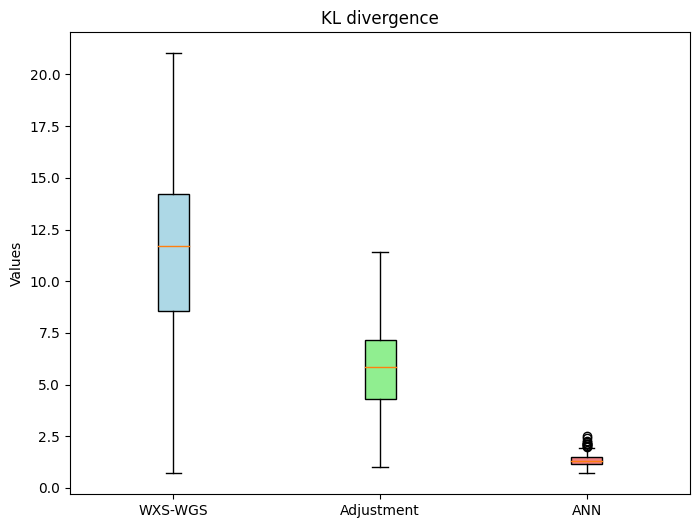

In [125]:
# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
boxplot1 = ax.boxplot(D_kl_val, positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(D_ADJ_val, positions=[2], patch_artist=True)
boxplot3 = ax.boxplot(D_kl_ann_val, positions=[3], patch_artist=True)

# Personalizzazione dei colori
colors = ['lightblue', 'lightgreen', 'lightcoral']
for box, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Aggiunta di etichette e titoli
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['WXS-WGS', 'Adjustment', 'ANN'])
ax.set_ylabel('Values')
ax.set_title('KL divergence')

# Mostrare il grafico
plt.show()

VALIDATION 4 PACA ->246

In [126]:
input_val=INPUT_MATRIX_7.iloc[421:667,:]
target_val=TARGET_7.iloc[421:667,:]

In [127]:
df1=pd.concat([INPUT_MATRIX_7.iloc[0:421,:],TARGET_7.iloc[0:421,:]],axis=1)

In [128]:
df2=pd.concat([INPUT_MATRIX_7.iloc[667:902,:],TARGET_7.iloc[667:902,:]],axis=1)

In [129]:
df=df1.append(df2)

<ipython-input-129-a9d981095968>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [130]:
df_shuffled = shuffle(df, random_state=42)

In [131]:
input_matrix=df_shuffled.iloc[:,0:96]

In [132]:
target=df_shuffled.iloc[:,96:175]

In [133]:

import torch
import torch.nn as nn
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 96
hidden_size = 128
output_size = 79
torch.manual_seed(seed)
np.random.seed(seed)
# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)

# Addestramento della rete
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')



Epoch 1/1000, Loss: 1.6818358493073098
Epoch 11/1000, Loss: 1.639090776647781
Epoch 21/1000, Loss: 1.5846982812786066
Epoch 31/1000, Loss: 1.5135048878226884
Epoch 41/1000, Loss: 1.4305021073905253
Epoch 51/1000, Loss: 1.3484465300358517
Epoch 61/1000, Loss: 1.2820862980211287
Epoch 71/1000, Loss: 1.2385060343616239
Epoch 81/1000, Loss: 1.2141755554844174
Epoch 91/1000, Loss: 1.2007962782742463
Epoch 101/1000, Loss: 1.191851976374111
Epoch 111/1000, Loss: 1.1839067592377561
Epoch 121/1000, Loss: 1.1756339214883598
Epoch 131/1000, Loss: 1.16656858689292
Epoch 141/1000, Loss: 1.156364000245524
Epoch 151/1000, Loss: 1.1448083731471013
Epoch 161/1000, Loss: 1.1317700582976737
Epoch 171/1000, Loss: 1.1171757406578777
Epoch 181/1000, Loss: 1.101054932649669
Epoch 191/1000, Loss: 1.0835061404859476
Epoch 201/1000, Loss: 1.0647216459535331
Epoch 211/1000, Loss: 1.0450155437886834
Epoch 221/1000, Loss: 1.024811521405105
Epoch 231/1000, Loss: 1.0045412550843207
Epoch 241/1000, Loss: 0.9846228610

In [134]:
input_data_VAL = torch.tensor(input_val.values).float()

In [135]:
OUTPUT_VAL=net(input_data_VAL)

In [136]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [137]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [138]:
OUTPUT_VAL_PD.columns=COSMIC_SIGNATURE.columns
OUTPUT_VAL_PD.index=input_val.index

In [139]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
D_KL=np.zeros(246)
for i in range(246):
  D_KL[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+421,:]))

In [140]:
np.mean(D_KL)

6.006544212411584

In [141]:
D_KL_ANN=np.zeros(246)
for i in range(246):
  D_KL_ANN[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))

In [142]:
np.mean(D_KL_ANN)

1.4804044793548952

METODO CORRETTIVO

In [143]:
MATRIX_adjusted_VAL=MATRIX_7.iloc[421:667,:].copy()

In [144]:
for i in range(MATRIX_adjusted_VAL.shape[1]):
  MATRIX_adjusted_VAL.iloc[:,i]=(MATRIX_7.iloc[421:667,i]*rapporti[triplette_96[i]])+np.mean(MATRIX_7.iloc[421:667,i])

In [145]:
MATRIX_adjusted_VAL=MATRIX_adjusted_VAL.T

In [146]:
# Calcolare la somma di ogni colonna
sum_columns =MATRIX_adjusted_VAL.sum()


In [147]:
# Normalizzare ogni colonna dividendo per la somma della colonna
MATRIX_adjusted_VAL= MATRIX_adjusted_VAL.divide(sum_columns)

In [148]:
import cvxpy as cp
import numpy as np


n, m = 79, 246
X = COSMIC_SIGNATURE.values
Y = MATRIX_adjusted_VAL.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj_VAL = w.value
print("Coefficients:", coefficients_WE_adj_VAL)

Coefficients: [[2.46519238e-01 1.57957701e-01 1.66844657e-01 ... 2.13068065e-01
  1.71813236e-01 3.16892934e-02]
 [1.59806593e-02 3.53112791e-02 3.07766909e-02 ... 2.72135237e-02
  3.02275734e-02 7.35216042e-02]
 [1.18622142e-10 3.92278364e-11 6.18050761e-02 ... 4.92166906e-02
  1.47637531e-10 4.44854902e-12]
 ...
 [6.54091254e-13 1.99146785e-12 2.85616514e-12 ... 9.81209911e-13
  2.92326441e-12 6.00909696e-13]
 [4.47084645e-12 4.79461306e-12 4.21670645e-12 ... 7.13657537e-11
  2.50633876e-12 4.00218547e-10]
 [1.80975995e-12 1.30161743e-12 1.42625717e-12 ... 9.26693062e-13
  1.36661644e-12 1.21844747e-12]]


In [149]:
coefficients_WE_adj_VAL=pd.DataFrame(coefficients_WE_adj_VAL)

In [150]:
coefficients_WE_adj_VAL.index=COSMIC_SIGNATURE.columns

In [151]:
coefficients_WE_adj_VAL.columns=MATRIX_adjusted_VAL.columns

In [152]:
##BOXPLOT DELLE VARIE DIFFERENZE in termini di KL DIVERGENCE
D_ADJ_val=np.zeros(246)
for i in range(246):
  D_ADJ_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/coefficients_WE_adj_VAL.iloc[:,i]))
np.mean(D_ADJ_val)

6.73646733789842

In [153]:
D_kl_val=np.zeros(246)
for i in range(246):
  D_kl_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+421,:]))
np.mean(D_kl_val)

6.006544212411584

In [154]:
D_kl_ann_val=np.zeros(246)
for i in range(246):
  D_kl_ann_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))
np.mean(D_kl_ann_val)

1.4804044793548952

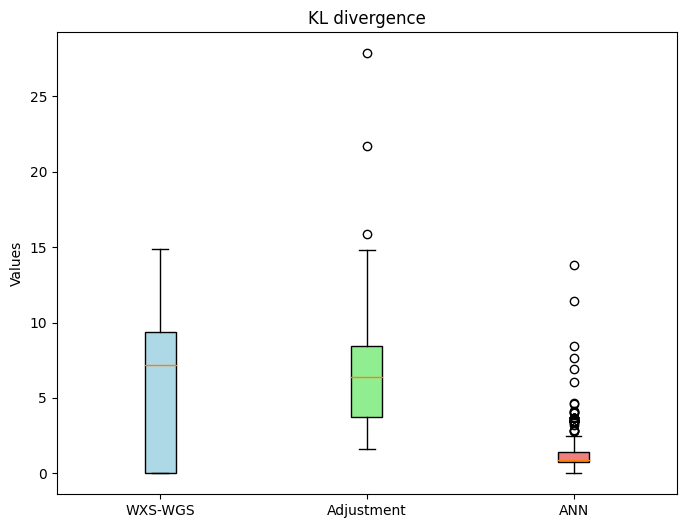

In [155]:
# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
boxplot1 = ax.boxplot(D_kl_val, positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(D_ADJ_val, positions=[2], patch_artist=True)
boxplot3 = ax.boxplot(D_kl_ann_val, positions=[3], patch_artist=True)

# Personalizzazione dei colori
colors = ['lightblue', 'lightgreen', 'lightcoral']
for box, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Aggiunta di etichette e titoli
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['WXS-WGS', 'Adjustment', 'ANN'])
ax.set_ylabel('Values')
ax.set_title('KL divergence')

# Mostrare il grafico
plt.show()

VALIDATION 5 RECA->95

In [156]:
input_val=INPUT_MATRIX_7.iloc[667:762,:]
target_val=TARGET_7.iloc[667:762,:]

In [157]:
df1=pd.concat([INPUT_MATRIX_7.iloc[0:667,:],TARGET_7.iloc[0:667,:]],axis=1)

In [158]:
df2=pd.concat([INPUT_MATRIX_7.iloc[762:902,:],TARGET_7.iloc[762:902,:]],axis=1)

In [159]:
df=df1.append(df2)

<ipython-input-159-a9d981095968>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [160]:
df_shuffled=shuffle(df,random_state=42)

In [161]:
input_matrix=df_shuffled.iloc[:,0:96]

In [162]:
target=df_shuffled.iloc[:,96:175]

In [163]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
import torch
import torch.nn as nn

# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 96
hidden_size = 128
output_size = 79
torch.manual_seed(seed)
np.random.seed(seed)
# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)

# Addestramento della rete
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')



Epoch 1/1000, Loss: 1.8174943568905553
Epoch 11/1000, Loss: 1.7724966064114687
Epoch 21/1000, Loss: 1.7166378380490475
Epoch 31/1000, Loss: 1.6435077153162434
Epoch 41/1000, Loss: 1.5560530565425479
Epoch 51/1000, Loss: 1.4661915595549444
Epoch 61/1000, Loss: 1.390078236060607
Epoch 71/1000, Loss: 1.334607656851637
Epoch 81/1000, Loss: 1.294987627619989
Epoch 91/1000, Loss: 1.262598431828074
Epoch 101/1000, Loss: 1.2316994360565936
Epoch 111/1000, Loss: 1.1990602268626622
Epoch 121/1000, Loss: 1.1636262421905097
Epoch 131/1000, Loss: 1.1256040876319042
Epoch 141/1000, Loss: 1.0859597857407783
Epoch 151/1000, Loss: 1.045892196433462
Epoch 161/1000, Loss: 1.0064439012250834
Epoch 171/1000, Loss: 0.9684021473962579
Epoch 181/1000, Loss: 0.9323506143659237
Epoch 191/1000, Loss: 0.8987579024201726
Epoch 201/1000, Loss: 0.8679739580805442
Epoch 211/1000, Loss: 0.8401770303958667
Epoch 221/1000, Loss: 0.815380473738431
Epoch 231/1000, Loss: 0.7934547784669409
Epoch 241/1000, Loss: 0.774157986

In [164]:
input_data_VAL = torch.tensor(input_val.values).float()

In [165]:
OUTPUT_VAL=net(input_data_VAL)

In [166]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [167]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [168]:
OUTPUT_VAL_PD.columns=COSMIC_SIGNATURE.columns
OUTPUT_VAL_PD.index=input_val.index

In [169]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
D_KL=np.zeros(95)
for i in range(95):
  D_KL[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+667,:]))

In [170]:
np.mean(D_KL)

11.746532912435116

In [171]:
D_KL_ANN=np.zeros(95)
for i in range(95):
  D_KL_ANN[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))

In [172]:
np.mean(D_KL_ANN)

1.7979762719530408

METODO CORRETTIVO

In [173]:
MATRIX_adjusted_VAL=MATRIX_7.iloc[667:762,:].copy()

In [174]:
for i in range(MATRIX_adjusted_VAL.shape[1]):
  MATRIX_adjusted_VAL.iloc[:,i]=(MATRIX_7.iloc[667:762,i]*rapporti[triplette_96[i]])+np.mean(MATRIX_7.iloc[667:762,i])

In [175]:
MATRIX_adjusted_VAL=MATRIX_adjusted_VAL.T

In [176]:
# Calcolare la somma di ogni colonna
sum_columns =MATRIX_adjusted_VAL.sum()


In [177]:
# Normalizzare ogni colonna dividendo per la somma della colonna
MATRIX_adjusted_VAL= MATRIX_adjusted_VAL.divide(sum_columns)

In [178]:
import cvxpy as cp
import numpy as np


n, m = 79, 95
X = COSMIC_SIGNATURE.values
Y = MATRIX_adjusted_VAL.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj_VAL = w.value
print("Coefficients:", coefficients_WE_adj_VAL)

Coefficients: [[3.18315031e-02 4.10142579e-02 6.66358974e-02 ... 1.71563057e-12
  2.89409028e-02 9.02410772e-02]
 [6.61113887e-04 1.79355267e-02 7.91743647e-03 ... 1.78906469e-02
  1.87018903e-13 2.70328766e-02]
 [1.57961424e-11 4.31781133e-02 2.96045424e-02 ... 1.70978744e-03
  1.12984071e-01 9.93784569e-02]
 ...
 [8.13081657e-13 2.13637343e-02 6.36268080e-13 ... 2.32664755e-02
  3.27032852e-03 3.79181794e-02]
 [5.91297388e-13 5.58662060e-13 1.55147216e-12 ... 6.92423739e-13
  2.08237322e-12 9.70154627e-13]
 [1.85935709e-12 7.72878485e-13 1.21503552e-12 ... 9.54593185e-13
  7.93578490e-13 1.86647065e-12]]


In [179]:
coefficients_WE_adj_VAL=pd.DataFrame(coefficients_WE_adj_VAL)

In [180]:
coefficients_WE_adj_VAL.index=COSMIC_SIGNATURE.columns

In [181]:
coefficients_WE_adj_VAL.columns=MATRIX_adjusted_VAL.columns

In [182]:
##BOXPLOT DELLE VARIE DIFFERENZE in termini di KL DIVERGENCE
D_ADJ_val=np.zeros(95)
for i in range(95):
  D_ADJ_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/coefficients_WE_adj_VAL.iloc[:,i]))
np.mean(D_ADJ_val)

5.973852338720503

In [183]:
D_kl_val=np.zeros(95)
for i in range(95):
  D_kl_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+667,:]))
np.mean(D_kl_val)

11.746532912435116

In [184]:
D_kl_ann_val=np.zeros(95)
for i in range(95):
  D_kl_ann_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))
np.mean(D_kl_ann_val)

1.7979762719530408

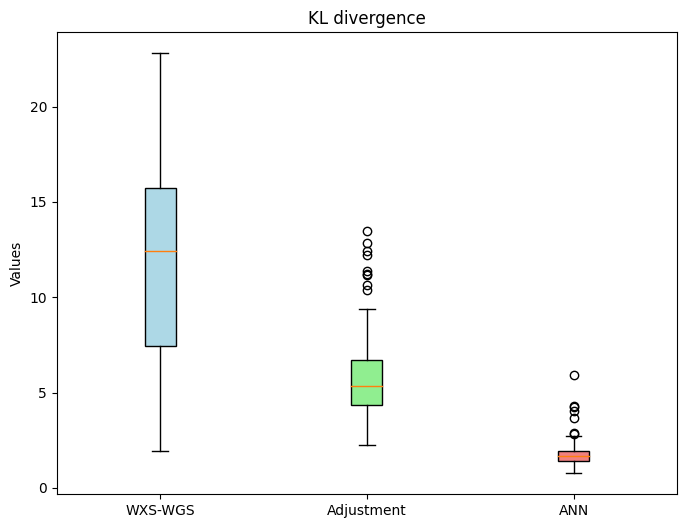

In [185]:
# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
boxplot1 = ax.boxplot(D_kl_val, positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(D_ADJ_val, positions=[2], patch_artist=True)
boxplot3 = ax.boxplot(D_kl_ann_val, positions=[3], patch_artist=True)

# Personalizzazione dei colori
colors = ['lightblue', 'lightgreen', 'lightcoral']
for box, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Aggiunta di etichette e titoli
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['WXS-WGS', 'Adjustment', 'ANN'])
ax.set_ylabel('Values')
ax.set_title('KL divergence')

# Mostrare il grafico
plt.show()

VALIDATION 6 skca ->100

In [186]:
input_val=INPUT_MATRIX_7.iloc[762:862,:]
target_val=TARGET_7.iloc[762:862,:]

In [187]:
df1=pd.concat([INPUT_MATRIX_7.iloc[0:762,:],TARGET_7.iloc[0:762,:]],axis=1)

In [188]:
df2=pd.concat([INPUT_MATRIX_7.iloc[862:902,:],TARGET_7.iloc[862:902,:]],axis=1)

In [189]:
df=df1.append(df2)
df_shuffled=shuffle(df,random_state=42)

<ipython-input-189-842f84aa58db>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [190]:
input_matrix=df_shuffled.iloc[:,0:96]

In [191]:
target=df_shuffled.iloc[:,96:175]

In [192]:

import torch
import torch.nn as nn
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 96
hidden_size = 128
output_size = 79
torch.manual_seed(seed)
np.random.seed(seed)
# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(input_matrix.values).float()
output_data = torch.tensor(target.values)

# Addestramento della rete
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')



Epoch 1/1000, Loss: 1.771784382280661
Epoch 11/1000, Loss: 1.7261014655467775
Epoch 21/1000, Loss: 1.667898111762149
Epoch 31/1000, Loss: 1.5915703669564034
Epoch 41/1000, Loss: 1.5006259940479747
Epoch 51/1000, Loss: 1.4080114416027352
Epoch 61/1000, Loss: 1.3302521276296664
Epoch 71/1000, Loss: 1.2751108363010701
Epoch 81/1000, Loss: 1.2387326662190588
Epoch 91/1000, Loss: 1.2111918012577942
Epoch 101/1000, Loss: 1.1853965343347856
Epoch 111/1000, Loss: 1.1581134523653196
Epoch 121/1000, Loss: 1.128874552425649
Epoch 131/1000, Loss: 1.0978837602324878
Epoch 141/1000, Loss: 1.0659628705496946
Epoch 151/1000, Loss: 1.0342324741605284
Epoch 161/1000, Loss: 1.0036150804715203
Epoch 171/1000, Loss: 0.974599354750181
Epoch 181/1000, Loss: 0.9474936132969305
Epoch 191/1000, Loss: 0.9223863032587631
Epoch 201/1000, Loss: 0.8991872592545748
Epoch 211/1000, Loss: 0.8778217860179669
Epoch 221/1000, Loss: 0.8581965943449122
Epoch 231/1000, Loss: 0.8402217025374703
Epoch 241/1000, Loss: 0.8237944

In [193]:
input_data_VAL = torch.tensor(input_val.values).float()

In [194]:
OUTPUT_VAL=net(input_data_VAL)

In [195]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [196]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [197]:
OUTPUT_VAL_PD.columns=COSMIC_SIGNATURE.columns
OUTPUT_VAL_PD.index=input_val.index

In [198]:
#CALCOLO KL DIVERGENCE PRE AGGIUSTAMENTO
D_KL=np.zeros(100)
for i in range(100):
  D_KL[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+762,:]))

In [199]:
np.mean(D_KL)

5.147715627353791

In [200]:
D_KL_ANN=np.zeros(100)
for i in range(100):
  D_KL_ANN[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))

In [201]:
np.mean(D_KL_ANN)

1.6798071591351214

METODO CORRETTIVO

In [202]:
MATRIX_adjusted_VAL=MATRIX_7.iloc[762:862,:].copy()

In [203]:
for i in range(MATRIX_adjusted_VAL.shape[1]):
  MATRIX_adjusted_VAL.iloc[:,i]=(MATRIX_7.iloc[762:862,i]*rapporti[triplette_96[i]])+np.mean(MATRIX_7.iloc[762:862,i])

In [204]:
MATRIX_adjusted_VAL=MATRIX_adjusted_VAL.T

In [205]:
# Calcolare la somma di ogni colonna
sum_columns =MATRIX_adjusted_VAL.sum()

In [206]:
# Normalizzare ogni colonna dividendo per la somma della colonna
MATRIX_adjusted_VAL= MATRIX_adjusted_VAL.divide(sum_columns)

In [207]:
import cvxpy as cp
import numpy as np


n, m = 79, 100
X = COSMIC_SIGNATURE.values
Y = MATRIX_adjusted_VAL.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj_VAL = w.value
print("Coefficients:", coefficients_WE_adj_VAL)

Coefficients: [[6.86962082e-13 8.39259526e-03 3.08088336e-11 ... 3.40708611e-02
  1.54224243e-02 1.42621508e-12]
 [1.49698690e-13 3.06886728e-14 6.92348232e-14 ... 4.39896534e-14
  6.97253104e-14 2.88130404e-14]
 [4.80935561e-12 2.25056893e-12 7.08386195e-13 ... 1.52203615e-12
  2.07808242e-12 1.40773031e-12]
 ...
 [2.33102537e-12 4.30863028e-12 8.23298181e-13 ... 2.07890135e-12
  2.20429215e-12 1.23018154e-12]
 [5.70036531e-12 1.55545242e-12 1.43775375e-12 ... 1.01184480e-12
  2.01232660e-12 1.75651569e-12]
 [7.06461099e-12 2.27719911e-12 6.74677353e-13 ... 8.51593754e-13
  1.90177431e-12 1.70418000e-12]]


In [208]:
coefficients_WE_adj_VAL=pd.DataFrame(coefficients_WE_adj_VAL)

In [209]:
coefficients_WE_adj_VAL.index=COSMIC_SIGNATURE.columns

In [210]:
coefficients_WE_adj_VAL.columns=MATRIX_adjusted_VAL.columns

In [211]:
##BOXPLOT DELLE VARIE DIFFERENZE in termini di KL DIVERGENCE
D_ADJ_val=np.zeros(100)
for i in range(100):
  D_ADJ_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/coefficients_WE_adj_VAL.iloc[:,i]))
np.mean(D_ADJ_val)

6.146912698641399

In [212]:
D_kl_val=np.zeros(100)
for i in range(100):
   D_kl_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/INPUT_EXP_7.iloc[i+762,:]))
np.mean(D_kl_val)

5.147715627353791

In [213]:
D_kl_ann_val=np.zeros(100)
for i in range(100):
  D_kl_ann_val[i]=np.sum(target_val.iloc[i,:]*np.log(target_val.iloc[i,:]/OUTPUT_VAL_PD.iloc[i,:]))
np.mean(D_kl_ann_val)

1.6798071591351214

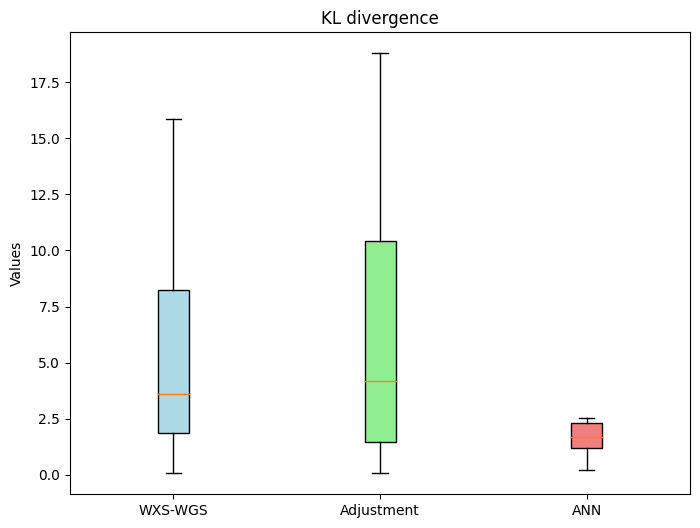

In [217]:
# Creazione della figura e degli assi
fig, ax = plt.subplots(figsize=(8, 6))

# Creazione dei boxplot
boxplot1 = ax.boxplot(D_kl_val, positions=[1], patch_artist=True)
boxplot2 = ax.boxplot(D_ADJ_val, positions=[2], patch_artist=True)
boxplot3 = ax.boxplot(D_kl_ann_val, positions=[3], patch_artist=True)

# Personalizzazione dei colori
colors = ['lightblue', 'lightgreen', 'lightcoral']
for box, color in zip([boxplot1, boxplot2, boxplot3], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

# Aggiunta di etichette e titoli
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['WXS-WGS', 'Adjustment', 'ANN'])
ax.set_ylabel('Values')
ax.set_title('KL divergence')

# Mostrare il grafico
plt.show()